<a href="https://colab.research.google.com/github/RafliRadithya23/Skripsi-/blob/main/Syntax/Data_Preparation_Syntax_Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data

Data yang akan digunakan merupakan data sekunder bersumber dari laman yahoofinance.com yang terdiri data penutupan Indeks Harga Saham Gabungan dengan kode (JKSE^) sebagai peubah respon (Y). Periode data yang diperoleh dimulai dari 3 Januari 2000 hingga 31 Desember 2024

In [ ]:
!pip install --upgrade yfinance

In [1]:
# Import library Yahoo Finance
import yfinance as yf
import pandas as pd

# Download data by Yahoo Finance API (selain minyak mentah brent)
data = yf.download(['^JKSE','^SET.BK','^KLSE','^STI',
                    'PSEI.PS','^N225','000001.SS','^KS11','^HSI'],
                   start = '2000-01-01',end='2025-05-9')['Close']
data = pd.DataFrame(data)
data.columns = ['SSE','PSEI','HSI','IHSG','KLSE','KS11','N225','SET.BK','STI']
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  9 of 9 completed


,SSE,PSEI,HSI,IHSG,KLSE,KS11,N225,SET.BK,STI
Date,,,,,,,,,
2000-01-03,NaN,2141.219482,17369.630859,NaN,833.890015,NaN,NaN,NaN,2582.939941
2000-01-04,1406.370972,2152.626465,17072.820312,700.190796,832.799988,1059.040039,19002.859375,498.459991,2530.149902
2000-01-05,1409.682007,2074.216553,15846.719727,678.060608,815.799988,986.309998,18542.550781,465.850006,2391.030029
2000-01-06,1463.942017,2078.575684,15153.230469,688.494202,818.429993,960.789978,18168.269531,443.459991,2359.209961
2000-01-07,1516.604004,2093.751709,15405.629883,NaN,NaN,948.650024,18193.410156,453.309998,2406.040039
...,...,...,...,...,...,...,...,...,...
2025-05-02,NaN,6411.859863,22504.679688,6815.729980,1542.489990,2559.790039,36830.691406,1198.979980,3845.139893
2025-05-05,NaN,6359.629883,NaN,6831.952148,1539.540039,NaN,NaN,NaN,3853.070068
2025-05-06,3316.114014,6418.689941,22662.710938,6898.196777,1536.800049,NaN,NaN,1187.859985,3860.409912


## Data yang Tidak Lengkap

Terdapat data yang tidak lengkap dari situs Yahoo Finance, yaitu:
-   Harga Minyak Mentah Brent (USD/Barel)
-   Indeks Harga Saham Vietnam (VIN)
-   Nilai USD/IDR
-   Harga Spot Emas Berjangka (XAUUSD)

Selanjutnya, akan dilakukan merger data untuk mendapatkan data closing price dari website investing.com

In [2]:
# Import data brent oil (date,closing)
path_1 = "/content/drive/MyDrive/1. Skripsi/Syntax dan Data/Data Historis Minyak Brent Berjangka (1).csv"
brent = pd.read_csv(path_1,sep=',')
brent = brent.iloc[:,0:2]
brent.columns = ['Date','Brent']
brent['Brent'] = brent['Brent'].str.replace(",","").astype(float)

# Ubah kolom date sebagai referensi index
brent['Date'] = pd.to_datetime(brent['Date'],format='%d/%m/%Y')
brent = brent.set_index('Date')

# Sort date (periode terlama -> terbaru)
brent = brent.sort_index(ascending=True)
brent.head()

,Brent
Date,
2000-01-04,2439.0
2000-01-05,2373.0
2000-01-06,2362.0
2000-01-07,2309.0
2000-01-10,2373.0


In [3]:
# Import data vietnam stock index (date,closing)
path_2 = "/content/drive/MyDrive/1. Skripsi/Syntax dan Data/VN Index Historical Data (1).csv"
vietnam = pd.read_csv(path_2,sep=',')
vietnam = vietnam.iloc[:,0:2]
vietnam.columns = ['Date','VIN']
vietnam['VIN'] = vietnam['VIN'].str.replace(",","").astype(float)

# Ubah kolom date sebagai referensi index
vietnam['Date'] = pd.to_datetime(vietnam['Date'],format='%m/%d/%Y')
vietnam = vietnam.set_index('Date')

# Sort date (periode terlama -> terbaru)
vietnam = vietnam.sort_index(ascending=True)
vietnam.head()



,VIN
Date,
2000-07-31,101.55
2000-08-02,103.38
2000-08-04,105.20
2000-08-07,106.92
2000-08-09,108.64


In [4]:
# Import Data USD/IDR
path_3 = "/content/drive/MyDrive/1. Skripsi/Syntax dan Data/Data Historis USD_IDR (3).csv"
usd = pd.read_csv(path_3)
usd = usd.iloc[:,0:2]
usd.columns = ['Date','USD/IDR']

# Ubah menjadi tipe float
usd['USD/IDR'] = usd['USD/IDR'].str.replace(".","").str.replace(",",".").astype(float)


# Ubah kolom date sebagai referensi index
usd['Date'] = pd.to_datetime(usd['Date'],format='%d/%m/%Y')
usd = usd.set_index('Date')

# Sort date (periode terlama -> terbaru)
usd = usd.sort_index(ascending=True)
usd

,USD/IDR
Date,
2000-01-03,7055.0
2000-01-04,7165.0
2000-01-05,7155.0
2000-01-06,7255.0
2000-01-07,7155.0
...,...
2025-05-05,16435.0
2025-05-06,16450.0
2025-05-07,16535.0


In [5]:
# Import data harga spot emas (XAUUSD)
path_4 = "/content/drive/MyDrive/1. Skripsi/Syntax dan Data/Data Historis XAU_USD (1).csv"
gold = pd.read_csv(path_4)

# Ambil data harga closing dan tanggal
gold = gold.iloc[:,0:2]
gold.columns = ['Date','Gold']

# Ubah menjadi tipe float
gold['Gold'] = gold['Gold'].str.replace(".","").str.replace(",",".").astype(float)
gold['Date'] = pd.to_datetime(gold['Date'],format='%d/%m/%Y')
gold = gold.set_index('Date')

# Sort date (periode terlama -> terbaru)
gold = gold.sort_index(ascending=True)
gold.head()

,Gold
Date,
2000-01-03,289.00
2000-01-04,282.45
2000-01-05,281.00
2000-01-06,281.23
2000-01-07,281.75


In [6]:

# Merging data Brent Oil, Vietnam Index, dan Gold, USD/IDR terhadap data yang akan diolah
data_update = pd.merge(data,brent,on='Date',how='left')
data_update = pd.merge(data_update,vietnam,on='Date',how='left')
data_update = pd.merge(data_update,gold,on='Date',how='left')
data_update = pd.merge(data_update,usd,on='Date',how='left')

# Mengurutkan kolom
data_update = data_update[['IHSG','USD/IDR','Gold','Brent',
                           'STI','KLSE','SET.BK','VIN','PSEI',
                           'SSE','HSI','KS11','N225']]
data_update

,IHSG,USD/IDR,Gold,Brent,STI,KLSE,SET.BK,VIN,PSEI,SSE,HSI,KS11,N225
Date,,,,,,,,,,,,,
2000-01-03,NaN,7055.0,289.00,NaN,2582.939941,833.890015,NaN,NaN,2141.219482,NaN,17369.630859,NaN,NaN
2000-01-04,700.190796,7165.0,282.45,2439.0,2530.149902,832.799988,498.459991,NaN,2152.626465,1406.370972,17072.820312,1059.040039,19002.859375
2000-01-05,678.060608,7155.0,281.00,2373.0,2391.030029,815.799988,465.850006,NaN,2074.216553,1409.682007,15846.719727,986.309998,18542.550781
2000-01-06,688.494202,7255.0,281.23,2362.0,2359.209961,818.429993,443.459991,NaN,2078.575684,1463.942017,15153.230469,960.789978,18168.269531
2000-01-07,NaN,7155.0,281.75,2309.0,2406.040039,NaN,453.309998,NaN,2093.751709,1516.604004,15405.629883,948.650024,18193.410156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-02,6815.729980,16435.0,3240.88,6129.0,3845.139893,1542.489990,1198.979980,NaN,6411.859863,NaN,22504.679688,2559.790039,36830.691406
2025-05-05,6831.952148,16435.0,3334.50,6023.0,3853.070068,1539.540039,NaN,1240.05,6359.629883,NaN,NaN,NaN,NaN
2025-05-06,6898.196777,16450.0,3430.21,6215.0,3860.409912,1536.800049,1187.859985,1241.95,6418.689941,3316.114014,22662.710938,NaN,NaN


## Kelengkapan Data

In [ ]:
# pengecekan format
data_update.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6595 entries, 2000-01-03 to 2025-05-08
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   IHSG     6153 non-null   float64
 1   USD/IDR  6540 non-null   float64
 2   Gold     6585 non-null   float64
 3   Brent    6510 non-null   float64
 4   STI      6341 non-null   float64
 5   KLSE     6217 non-null   float64
 6   SET.BK   6181 non-null   float64
 7   VIN      6025 non-null   float64
 8   PSEI     6284 non-null   float64
 9   SSE      6133 non-null   float64
 10  HSI      6243 non-null   float64
 11  KS11     6244 non-null   float64
 12  N225     6208 non-null   float64
dtypes: float64(13)
memory usage: 721.3 KB


In [7]:
# Jumlah missing value setiap peubah

def analisis_missing_periode(df):
    hasil = pd.DataFrame({
        'jumlah missing value': df.isna().sum(),
        'periode awal': df.apply(lambda col: col.first_valid_index())
    })

    return hasil
missing_value = analisis_missing_periode(data_update).sort_values(by='periode awal',ascending=True)
missing_value

,jumlah missing value,periode awal
USD/IDR,55,2000-01-03
Gold,10,2000-01-03
STI,254,2000-01-03
KLSE,378,2000-01-03
PSEI,311,2000-01-03
HSI,352,2000-01-03
IHSG,442,2000-01-04
Brent,85,2000-01-04
SET.BK,414,2000-01-04
SSE,462,2000-01-04


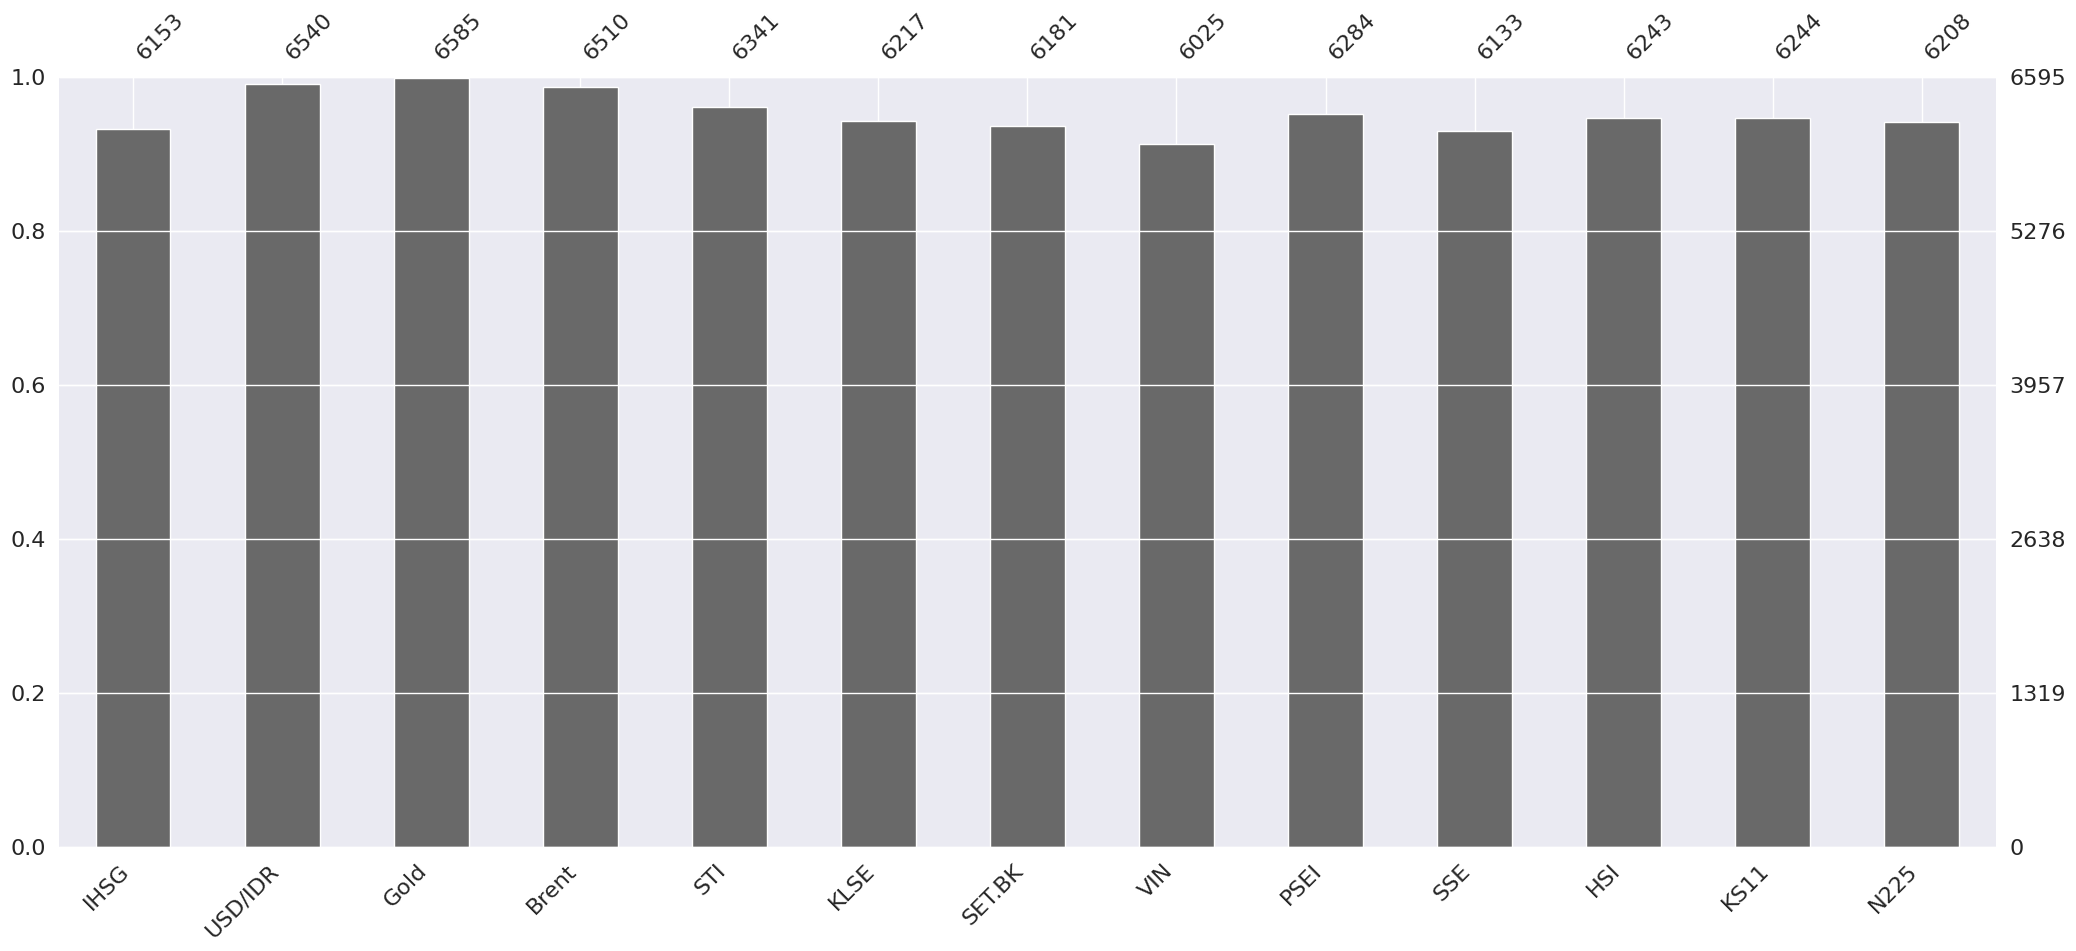

In [8]:
# Bar Chart Missing Value
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(15,5))
msno.bar(data_update)


plt.show()

## Plot Setiap Peubah

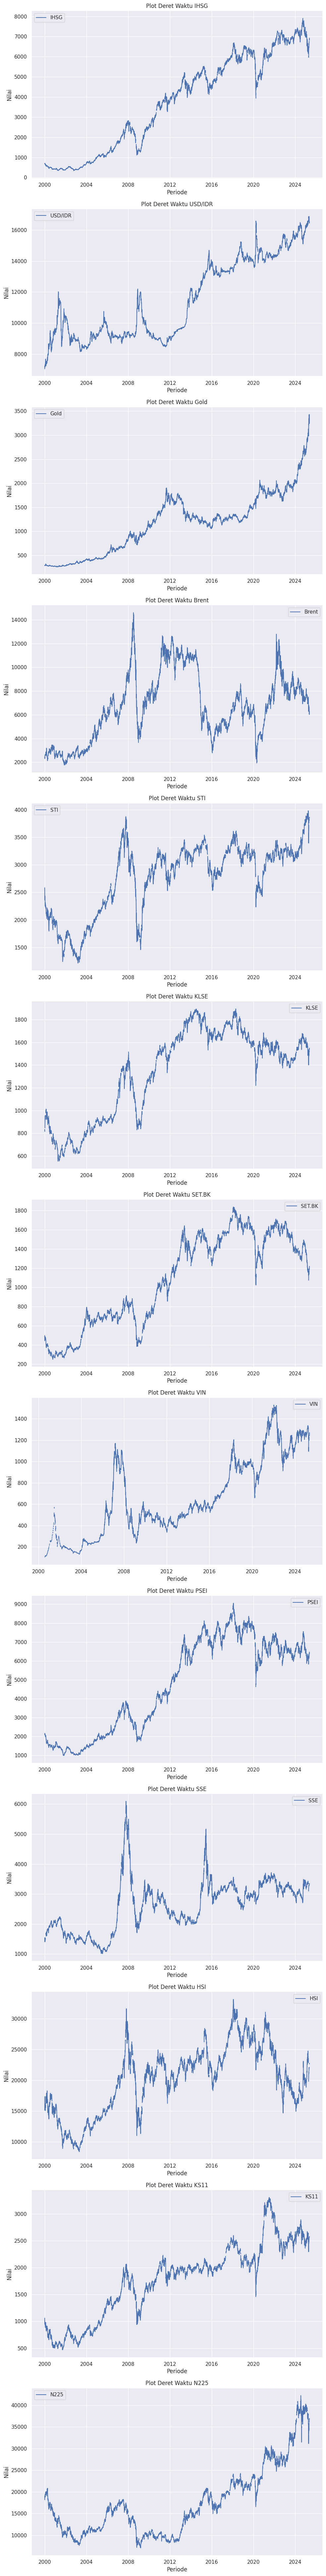

In [9]:
# Plot time series setiap variabel

import pandas as pd
import matplotlib.pyplot as plt

def plot_timeseries(df):
  n_kolom = df.shape[1]
  fig, axes = plt.subplots(n_kolom, 1, figsize=(10, 6*n_kolom))
  for i,col in enumerate(df.columns):
    axes[i].plot(df.index, df[col], label=col)
    axes[i].set_xlabel('Periode')
    axes[i].set_ylabel('Nilai')
    axes[i].set_title(f'Plot Deret Waktu {col}')
    axes[i].legend()
  plt.tight_layout()
  plt.show()
plot_timeseries(data_update)



Pada setiap plot peubah, terdapat indikasi missing value yang ditandai dengan adanya tren yang terpotong pada grafik sehingga akan dilakukan penanganan dengan interpolasi linear pada setiap peubah

## Imputasi Data dengan Interpolasi Linear

In [10]:
# Fungsi interpolasi linear

def interpolasi_linear(df):
  import matplotlib.pyplot as plt

  # interpolasi linear
  posisi_na = df.isna()
  df_interpolated = df.interpolate(method='linear')

  # Plot
  n_kolom = df.shape[1]
  fig, axes = plt.subplots(n_kolom, 1, figsize=(10, 5*n_kolom))
  for i,col in enumerate(df.columns):

    # Scatter data asli
    axes[i].scatter(df.index[~posisi_na[col]], df[col][~posisi_na[col]], label='Data Asli', color='blue', alpha=0.6)

    # Scatter data interpolasi
    axes[i].scatter(df.index[posisi_na[col]], df_interpolated[col][posisi_na[col]],
                    label='Data Imputasi', color='red', marker = 'x', s=60)
    # Sumbu keterangan
    axes[i].set_xlabel('Periode')
    axes[i].set_ylabel('Nilai')
    axes[i].set_title(f'Plot Deret Waktu {col}')
    axes[i].legend()

  plt.tight_layout()
  plt.show()
  return df_interpolated


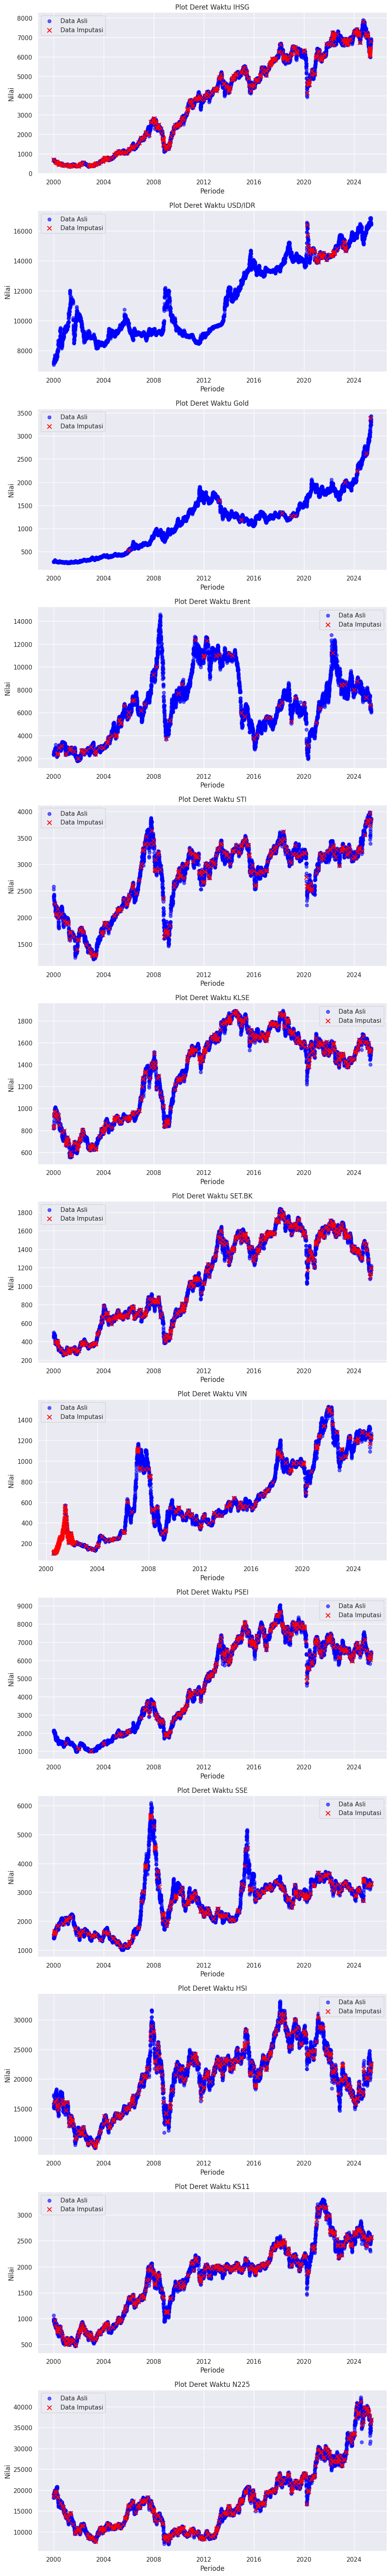

,IHSG,USD/IDR,Gold,Brent,STI,KLSE,SET.BK,VIN,PSEI,SSE,HSI,KS11,N225
Date,,,,,,,,,,,,,
2000-01-03,NaN,7055.0,289.00,NaN,2582.939941,833.890015,NaN,NaN,2141.219482,NaN,17369.630859,NaN,NaN
2000-01-04,700.190796,7165.0,282.45,2439.0,2530.149902,832.799988,498.459991,NaN,2152.626465,1406.370972,17072.820312,1059.040039,19002.859375
2000-01-05,678.060608,7155.0,281.00,2373.0,2391.030029,815.799988,465.850006,NaN,2074.216553,1409.682007,15846.719727,986.309998,18542.550781
2000-01-06,688.494202,7255.0,281.23,2362.0,2359.209961,818.429993,443.459991,NaN,2078.575684,1463.942017,15153.230469,960.789978,18168.269531
2000-01-07,690.988118,7155.0,281.75,2309.0,2406.040039,827.866659,453.309998,NaN,2093.751709,1516.604004,15405.629883,948.650024,18193.410156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-02,6815.729980,16435.0,3240.88,6129.0,3845.139893,1542.489990,1198.979980,1236.6125,6411.859863,3297.572510,22504.679688,2559.790039,36830.691406
2025-05-05,6831.952148,16435.0,3334.50,6023.0,3853.070068,1539.540039,1193.419983,1240.0500,6359.629883,3306.843262,22583.695312,2564.460042,36813.680990
2025-05-06,6898.196777,16450.0,3430.21,6215.0,3860.409912,1536.800049,1187.859985,1241.9500,6418.689941,3316.114014,22662.710938,2569.130046,36796.670573


In [11]:
# Data interpolasi
df = interpolasi_linear(data_update)
df


In [ ]:
analisis_missing_periode(df)

,jumlah missing value,periode awal
IHSG,1,2000-01-04
USD/IDR,0,2000-01-03
Gold,0,2000-01-03
Brent,1,2000-01-04
STI,0,2000-01-03
KLSE,0,2000-01-03
SET.BK,1,2000-01-04
VIN,150,2000-07-31
PSEI,0,2000-01-03
SSE,1,2000-01-04


Berdasarkan penelusuran pada website https://id.tradingeconomics.com/ disebutkan bahwa Indeks Pasar Vietnam (VIN) baru saja rilis pada bulan Juli tahun 2000 sehingga periode data yang tersedia di website mulai periode 2000-07-31 sehingga data yang akan digunakan mulai tahun 31-07-2000

In [14]:
# Update data
data_update2 = df.loc["2000-07-31":"2025-05-08"]
data_update2

,IHSG,USD/IDR,Gold,Brent,STI,KLSE,SET.BK,VIN,PSEI,SSE,HSI,KS11,N225
Date,,,,,,,,,,,,,
2000-07-31,492.173828,8925.0,277.25,2693.0,2051.209961,798.830017,284.670013,101.5500,1416.805786,2023.538940,16840.980469,705.969971,15727.490234
2000-08-01,489.657959,8950.0,277.35,2714.0,2074.080078,804.590027,295.489990,102.4650,1409.967407,2028.151001,16897.449219,727.099976,16099.669922
2000-08-02,490.417938,8815.0,277.55,2759.0,2065.919922,802.530029,301.220001,103.3800,1412.406860,2030.682983,17277.390625,728.330017,16206.190430
2000-08-03,491.972870,8605.0,274.00,2831.0,2045.030029,809.869995,307.970001,104.2900,1435.690918,2036.301025,17274.279297,722.080017,15814.440430
2000-08-04,494.140778,8620.0,273.25,2937.0,2052.729980,814.989990,311.420013,105.2000,1450.807007,2026.360962,17425.699219,710.000000,15667.360352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-02,6815.729980,16435.0,3240.88,6129.0,3845.139893,1542.489990,1198.979980,1236.6125,6411.859863,3297.572510,22504.679688,2559.790039,36830.691406
2025-05-05,6831.952148,16435.0,3334.50,6023.0,3853.070068,1539.540039,1193.419983,1240.0500,6359.629883,3306.843262,22583.695312,2564.460042,36813.680990
2025-05-06,6898.196777,16450.0,3430.21,6215.0,3860.409912,1536.800049,1187.859985,1241.9500,6418.689941,3316.114014,22662.710938,2569.130046,36796.670573


In [16]:
# Download data into csv
data_update2.to_csv('Data_Skripsi IHSG.csv')